In [1]:
%matplotlib inline
import scipy.stats as sct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import japanize_matplotlib
from ipywidgets import interact, fixed
import glob
import pickle
from pprint import pprint
import os
from PIL import Image
from tqdm import tqdm

In [2]:
%%html
<style>
div.input {
    display:none;
}
</style>

In [3]:
def loadfile(getfilename):
    filename = glob.glob(getfilename)[0]
    with open(filename, 'rb') as f:
        variable = pickle.load(f)
    return variable

# 正常データと異常データを投入して自動で判別して学習
# 異常と正常の閾値を部分空間のdiffで更新
# rejectあり
## 10回平均をとって３σでaccuracy
- 3σで10回づつ行い，学習した枚数ごとに平均を取ったもの
- carpetとgridのグラフの縦軸のレンジは他のものと違う

In [4]:
def plot_ac(pc, ms, auclog, color=None, nomax=False):
    if nomax:
        plt.plot(auclog, label="{0}σ, {1}".format(ms, pc), color=color, marker='.')
    else:
        plt.plot(auclog, label="{}σ, {}, Start={:.3f}, Max={:.3f}, End={:.3f}".format(ms, pc, auclog[0], max(auclog), auclog[-1]), color=color)

In [5]:
# dirname = 'output4all_reject_10_sigma_norm/'
# dirname = 'output4all/'
dirname = 'output4all_cgn_updthre5_reject_defgmix_10forfull/'
def show_eachresult_reject(classn, parmc, n_layer, threshold, mul_sigs, ONE=False):
    plt.rcParams['figure.figsize'] = (15.0, 10.0)
    plt.figure()
    
    
    plt.subplot(2, 2, 1)
    plt.title("AUC with Reject")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("AUC with Reject")
    plt.ylim(0.8, 1)
    if classn=='carpet':
        plt.ylim(0.7, 0.9)
    elif classn=='grid':
        plt.ylim(0.4, 0.6)
    elif classn=='toothbrush':
        plt.ylim(0.995, 1.0)
    for pc in parmc:
        for ms in mul_sigs:
            dirname1 = dirname + classn + '._mbn_{0}.{1}.*.{2}.{3}'.format(pc, n_layer, threshold, ms)
            auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
            # print(len(auclogs))
            if len(auclogs) == 0:
                assert False
                dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
                auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
            auclog1 = []
            for aul in auclogs:
                auclog1.append(loadfile(aul))
                avg_auclog1 = []
                for itm in zip(*auclog1):
                    avg_auclog1.append(np.mean(itm))
            if ONE:
                avg_auclog1 = auclog1[0]
            plot_ac(pc, ms, avg_auclog1)
    plt.legend()
    # plt.savefig(os.path.join('fig4ppt', classn+'.png'))
    
    
    plt.subplot(2, 2, 2)
    plt.title("Accuracy with Reject [%]")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("Accuracy with Reject [%]")
    plt.ylim(0, 1)
    for pc in parmc:
        for ms in mul_sigs:
            dirname1 = dirname + classn + '._mbn_{0}.{1}.*.{2}.{3}'.format(pc, n_layer, threshold, ms)
            acclogs = glob.glob(os.path.join(dirname1, "ACClog*.pcl"))
            if len(acclogs) == 0:
                dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
                acclogs = glob.glob(os.path.join(dirname1, "ACClog*.pcl"))
            acclog1 = []
            for acl in acclogs:
                acclog1.append(loadfile(acl))
                avg_acclog1 = []
                for itm in zip(*acclog1):
                    avg_acclog1.append(np.mean(itm))
                if ONE:
                    avg_acclog1 = acclog1[0]
            plot_ac(pc, ms, avg_acclog1)
    plt.legend()
    
#     plt.subplot(2, 2, 3)
#     plt.title("学習済み正常画像の異常度の推移")
#     plt.xlabel("Number of Defective Images")
#     plt.ylabel("正常画像の異常度")
#     # plt.ylim(0, 1)
#     for ms in mul_sigs:
#         dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
#         acclogs = glob.glob(os.path.join(dirname1, "GOODAVGlog*.pcl"))
#         if len(acclogs) == 0:
#             dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
#             acclogs = glob.glob(os.path.join(dirname1, "GOODAVGlog*.pcl"))
#         acclog1 = []
#         for acl in acclogs:
#             acclog1.append(loadfile(acl))
#             avg_acclog1 = []
#             for itm in zip(*acclog1):
#                 avg_acclog1.append(np.mean(itm))
#             if ONE:
#                 avg_acclog1 = acclog1[0]
#         plot_ac(ms, avg_acclog1, nomax=True)
#     plt.legend()
    
#     plt.subplot(2, 2, 4)
#     plt.title("閾値の推移")
#     plt.xlabel("Number of Defective Images")
#     plt.ylabel("閾値の異常度")
#     # plt.ylim(0, 1)
#     for ms in mul_sigs:
#         dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
#         acclogs = glob.glob(os.path.join(dirname1, "THRElog*.pcl"))
#         if len(acclogs) == 0:
#             dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
#             acclogs = glob.glob(os.path.join(dirname1, "THRElog*.pcl"))
#         acclog1 = []
#         for acl in acclogs:
#             acclog1.append(loadfile(acl))
#             avg_acclog1 = []
#             for itm in zip(*acclog1):
#                 avg_acclog1.append(np.mean(itm))
#             if ONE:
#                 avg_acclog1 = acclog1[0]
#         plot_ac(ms, avg_acclog1, nomax=True)
#     plt.legend()
    



bottle


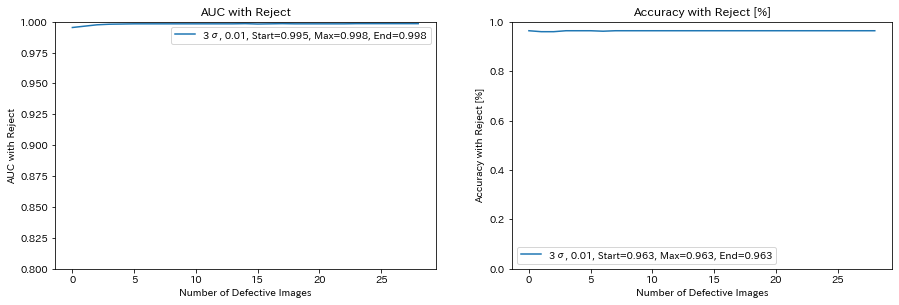



cable


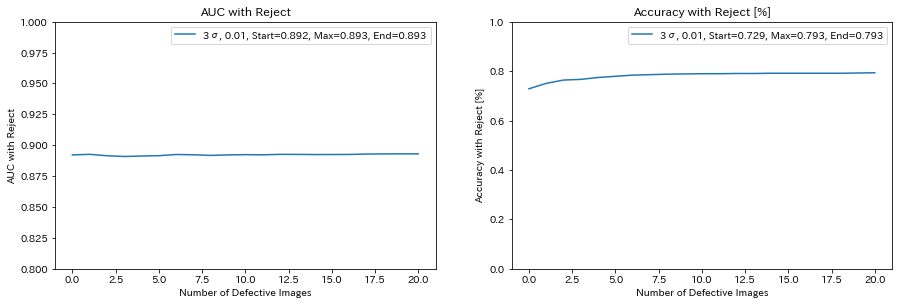



capsule


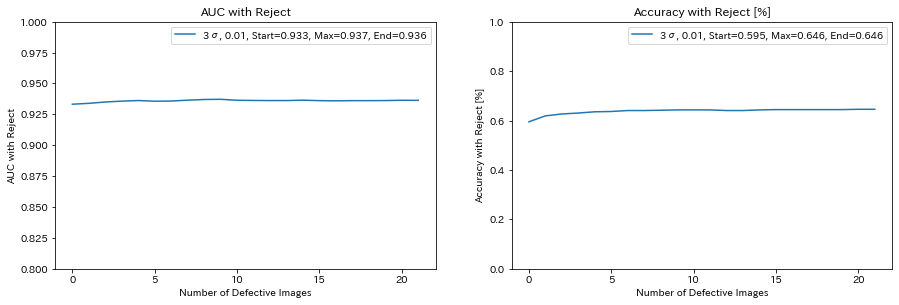



carpet


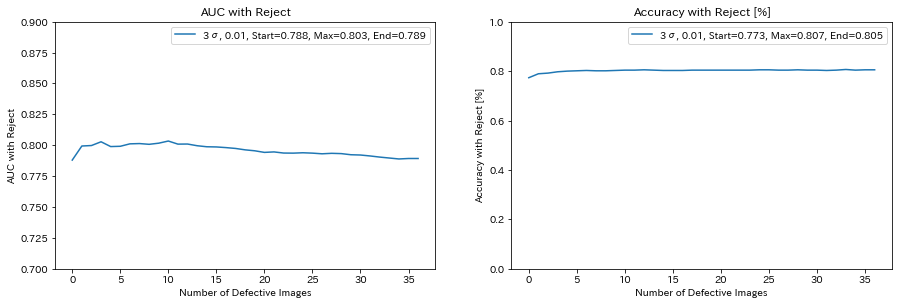



grid


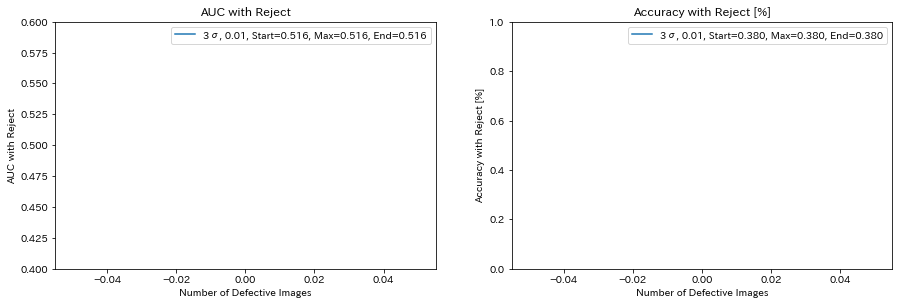



hazelnut


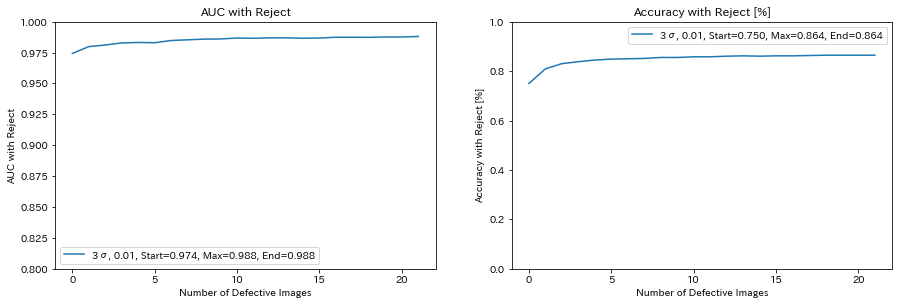



leather


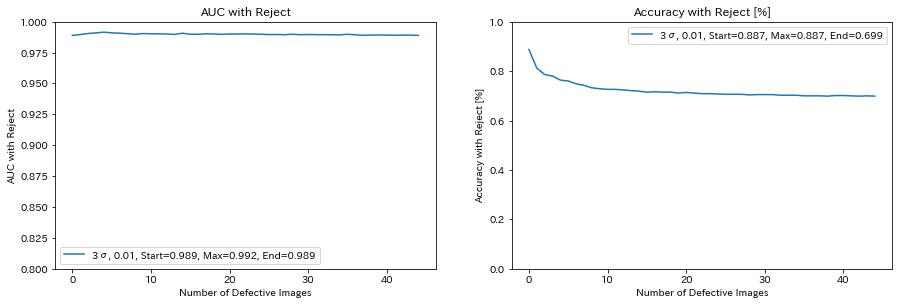



metal_nut


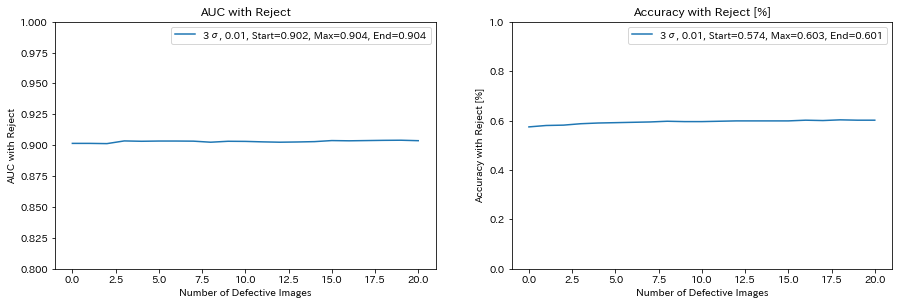



pill


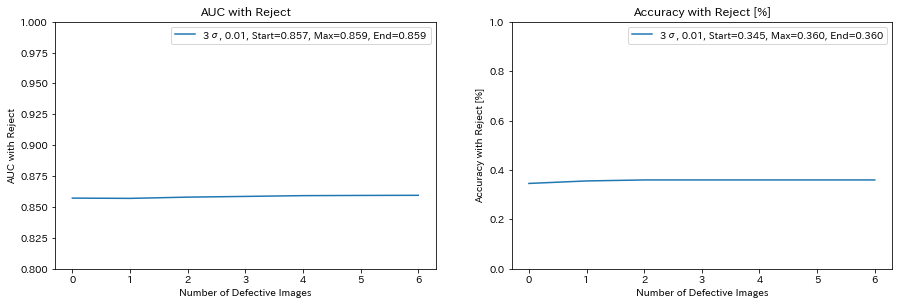



screw


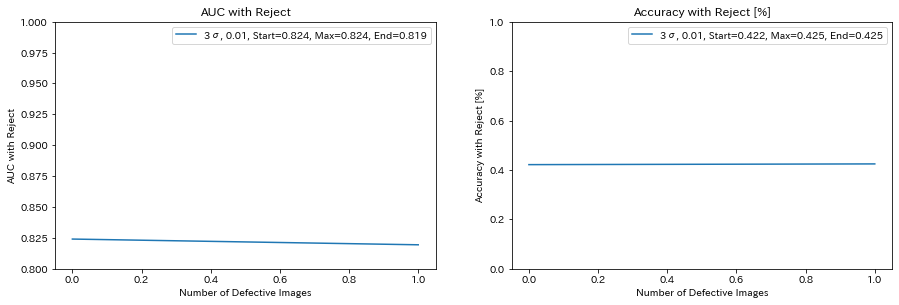



tile


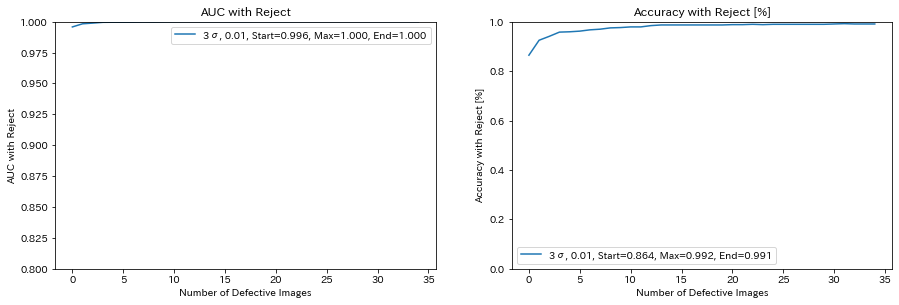



toothbrush


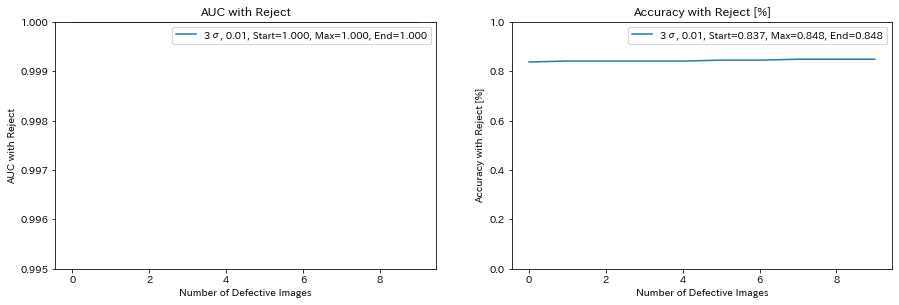



transistor


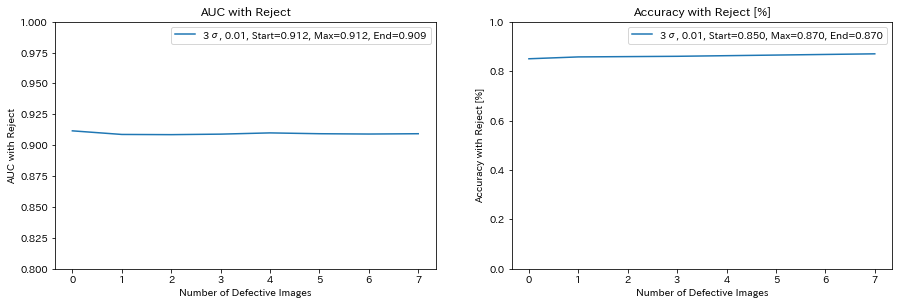



wood


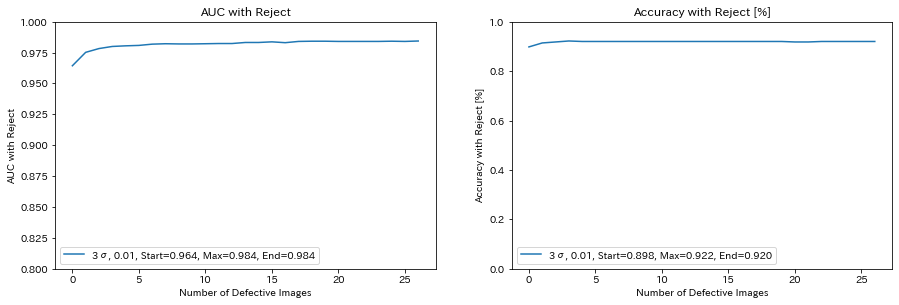



zipper


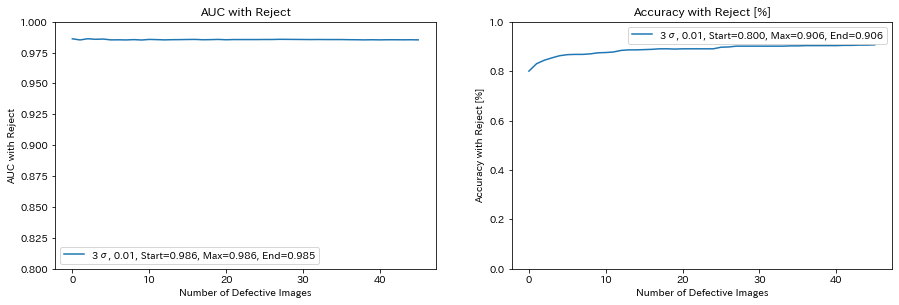

In [6]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
# parmc = [0.001, 0.005, 0.01, 0.05, 0.1]
parmc = [0.01]
# mul_sigs = [1, 3, 5]
mul_sigs = [3]
# print(classn)
# interact(show_eachresult_reject, classn=classn, n_layer=n_layers, threshold=thresholds)
for c in classn:
    print('\n\n' + '='*100)
    print(c)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([0])), ONE=False)
    show_eachresult_reject(classn=c, parmc=parmc, n_layer=19, threshold=0.999, mul_sigs=list(reversed(mul_sigs)), ONE=False)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=True)
    plt.show()

In [7]:
## 論文用に票を作る
## AEに合わせて５回平均

In [8]:
# # dirname = 'output4all_reject_10_sigma_norm/'
# # dirname = 'output4all/'
# dirname = 'output4all_cgn/'
# def table_eachresult_reject(classn, n_layer, threshold, mul_sigs, ONE=False):
#     for ms in mul_sigs:
#         dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
#         auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
#         if len(auclogs) == 0:
#             dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
#             auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
#         auclog1 = []
#         # print("len", len(auclogs))
#         for aul in auclogs[:5]: ## 5回平均
#             auclog1.append(loadfile(aul))
#             avg_auclog1 = []
#             for itm in zip(*auclog1): # 時系列ごとに平均 / zipが最小の長さに合わせる
#                 avg_auclog1.append(np.mean(itm))
#         if ONE:
#             avg_auclog1 = auclog1[0]
#     # 最後のmul_sigの時の結果を表示 (no reject)
#     # print("{:.2f}".format(avg_auclog1[0]), end=', ') # 正常データのみ
#     for i in range(min(4, (len(avg_auclog1)//5)+1)):
#         # print((i*5)+1, end=', ')
#         print("{:.2f}".format(avg_auclog1[(i*5)]), end=', ')
#         # print(i*5, end=', ')
#     print('')

In [9]:
# logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
# classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
# for c in classn:
#     print("{:<15}".format(c), end=', ')
#     table_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=False)

In [10]:
## 論文用票

In [11]:
# # dirname = 'output4all_reject_10_sigma_norm/'
# # dirname = 'output4all/'
# dirname = 'output4all_cgn/'
def table_eachresult_reject(classn, pc, n_layer, threshold, mul_sigs, ONE=False, logtype="AUC"):
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_{0}.{1}.*.{2}.{3}'.format(pc, n_layer, threshold, ms)
        auclogs = glob.glob(os.path.join(dirname1, logtype+"log*.pcl"))
        assert len(auclogs)!=0
        # print(len(auclogs))
        auclog1 = []
        # print("len", len(auclogs))
        for aul in auclogs:
            auclog1.append(loadfile(aul))
            avg_auclog1 = []
            for itm in zip(*auclog1): # 時系列ごとに平均 / zipが最小の長さに合わせる
                avg_auclog1.append(np.mean(itm))
        if ONE:
            avg_auclog1 = auclog1[0]
    # print("{:.2f}".format(avg_auclog1[0]), end=', ') # 正常データのみ
    # print("len", len(avg_auclog1), end=': ')
    for i in range(0, min(6, len(avg_auclog1))):
        print("{:.3f}".format(avg_auclog1[i]), end=', ')
    print('')
#     # 0番目
#     print("{:.3f}".format(avg_auclog1[0]), end=', ')
#     if len(avg_auclog1)!=1:
#         # 1番目
#         print("{:.3f}".format(avg_auclog1[1]), end=', ')
#         # 6以降５飛び
#         for i in range(1, (len(avg_auclog1)//5)):
#             # print((i*5)+1, end=', ')
#             print("{:.3f}".format(avg_auclog1[(i*5)]), end=', ')
#             # print(i*5, end=', ')
#     print('')

In [12]:
## AUC
# 5飛び

In [13]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
print("{:<15}, init, \tano.1, \tano.2, ano.3, ano.4, ano.5".format("classname"))
for c in classn:
    print("{:<15}".format(c), end=', ')
    table_eachresult_reject(classn=c, pc=0.01, n_layer=19, threshold=0.999, mul_sigs=[3], ONE=False)
    # table_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=False)

classname      , init, 	ano.1, 	ano.2, ano.3, ano.4, ano.5
bottle         , 0.995, 0.996, 0.997, 0.998, 0.998, 0.998, 
cable          , 0.892, 0.893, 0.892, 0.891, 0.891, 0.892, 
capsule        , 0.933, 0.934, 0.935, 0.936, 0.936, 0.936, 
carpet         , 0.788, 0.799, 0.800, 0.803, 0.799, 0.799, 
grid           , 0.516, 
hazelnut       , 0.974, 0.980, 0.981, 0.983, 0.983, 0.983, 
leather        , 0.989, 0.990, 0.990, 0.991, 0.992, 0.991, 
metal_nut      , 0.902, 0.902, 0.901, 0.904, 0.903, 0.903, 
pill           , 0.857, 0.857, 0.858, 0.859, 0.859, 0.859, 
screw          , 0.824, 0.819, 
tile           , 0.996, 0.998, 0.999, 1.000, 1.000, 1.000, 
toothbrush     , 1.000, 1.000, 1.000, 1.000, 1.000, 1.000, 
transistor     , 0.912, 0.909, 0.909, 0.909, 0.910, 0.909, 
wood           , 0.964, 0.975, 0.978, 0.980, 0.980, 0.981, 
zipper         , 0.986, 0.985, 0.986, 0.986, 0.986, 0.985, 


In [14]:
## Accuracy
# 5飛び

In [15]:
# logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
# classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
# for c in classn:
#     print("{:<15}".format(c), end=', ')
#     table_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=[3], ONE=False, logtype="ACC")